<a href="https://colab.research.google.com/github/Nitroblaster99/steel_industry_ml/blob/main/Steel_Industry_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Analyze the data

In [3]:
df = pd.read_csv('Steel_industry_data.csv')

In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
df.rename(columns={"Lagging_Current_Reactive.Power_kVarh": "Lagging_Current_Reactive_Power_kVarh",
                   "CO2(tCO2)": 'CO2'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
df.shape

(35040, 11)

<ipython-input-8-f755fd62fc53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')


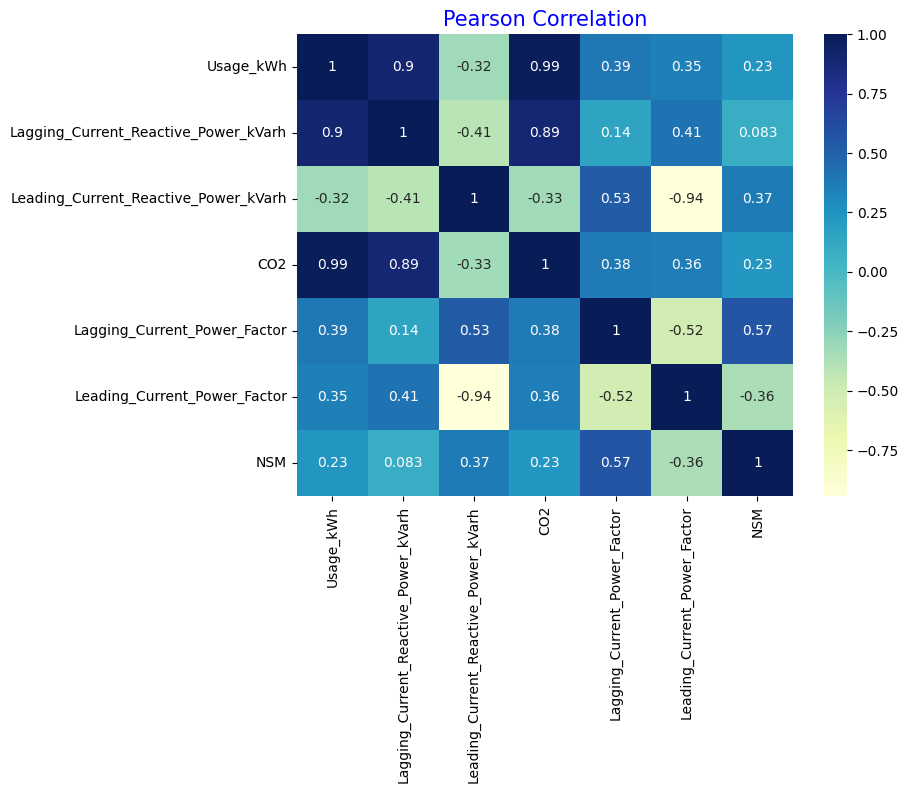

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')
plt.title('Pearson Correlation', fontsize= 15, color= 'b', loc='center')

plt.show()

The correlation of CO² and kWh is very high and makes sense, since in practice this has a direct relationship.

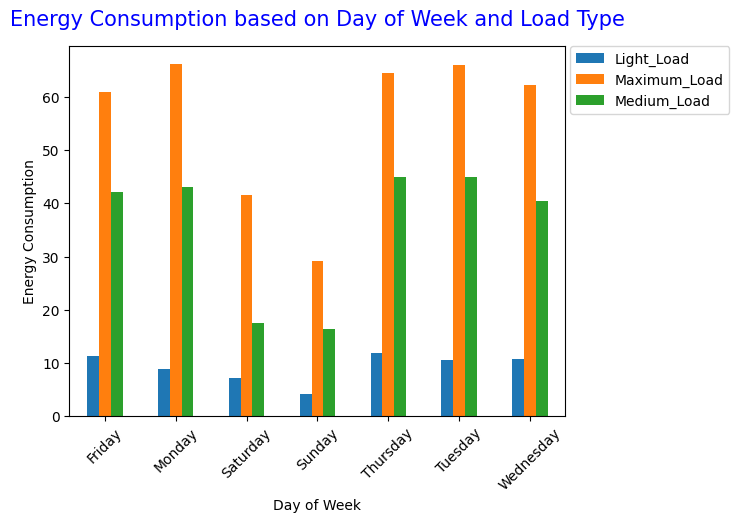

In [9]:
#visualize energy consumption based on day of week and load type

group = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
group.set_xticklabels(group.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15,
          pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)

plt.show()

Encode Categorical Values

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2                                   35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [11]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['time'] = df['date'].dt.time
df = df.drop(columns=['date'])

df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018,00:15:00
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018,00:30:00
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018,00:45:00
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018,01:00:00
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018,01:15:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  day                                   35040 non-null  int64  
 11  month          

In [13]:
df = df.drop(columns=['time'])
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


In [14]:
# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
categ = df.select_dtypes(include = "object").columns

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,1,1,2018
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,1,1,2018
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,1,1,2018
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,1,1,2018
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,1,1,2018


Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(['Usage_kWh'], axis=1)
y = df.Usage_kWh

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [16]:
y_train.shape

(24528,)

In [17]:
y_test.shape

(10512,)

Import and train models

In [18]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
%time lr = LinearRegression()

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs


In [19]:
model1 = lr.fit(X_train, y_train)

In [20]:
y_pred1 = model1.predict(X_test)

In [21]:
y_pred1

array([  2.90963416,  70.1634854 , 124.47042224, ...,   1.27370151,
         1.71223161,   5.0277308 ])

In [22]:
resid1 = y_test - y_pred1
resid1

11356   -0.029634
26543   -9.393485
2445    -4.050422
14649   -0.131385
32699   -4.262777
           ...   
11149   -0.370454
11558   -0.392259
27673    1.786298
20857    0.877768
3366    -0.637731
Name: Usage_kWh, Length: 10512, dtype: float64

<ipython-input-23-ddffea046d5d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid1, bins=10)


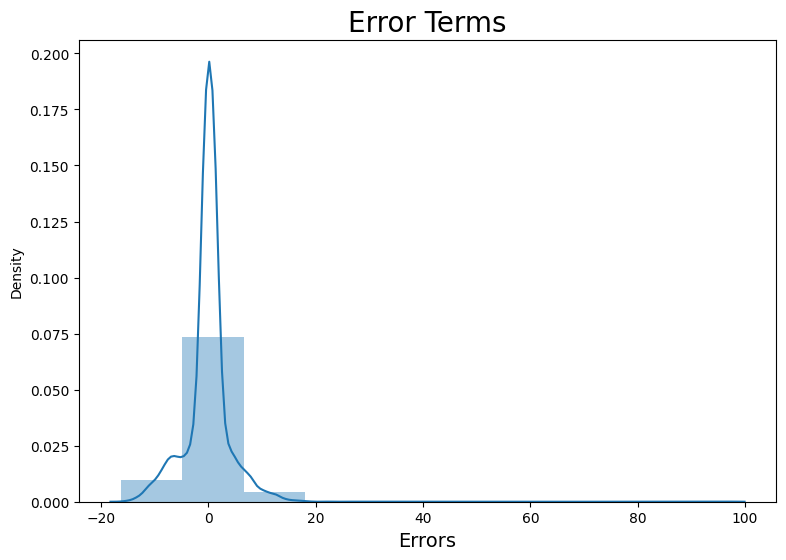

In [23]:
# Error plot

plt.figure(figsize=(9,6))

sns.distplot(resid1, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

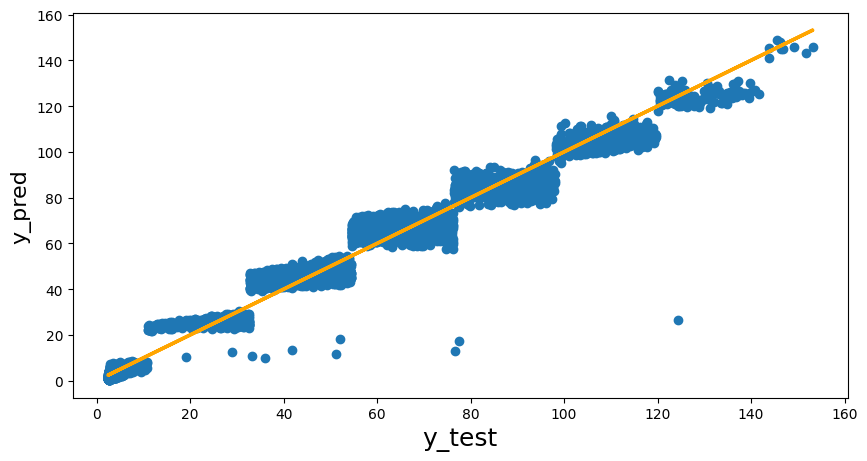

In [24]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred1)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:",r2_score(y_test, y_pred1))
print('MAE:', mean_absolute_error(y_test, y_pred1))
print('MSE:', mean_squared_error(y_test, y_pred1))

R2 Score: 0.9841689095787538
MAE: 2.615147825624607
MSE: 17.768550741754467


In [26]:
# Support Vector Regression model
from sklearn.svm import SVR

In [27]:
model2 = SVR()
model2.fit(X_train, y_train)

SVR()

In [28]:
y_pred2 = model2.predict(X_test)

In [29]:
resid2 = y_test - y_pred2

<ipython-input-30-f37422a72c72>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid2, bins=10)


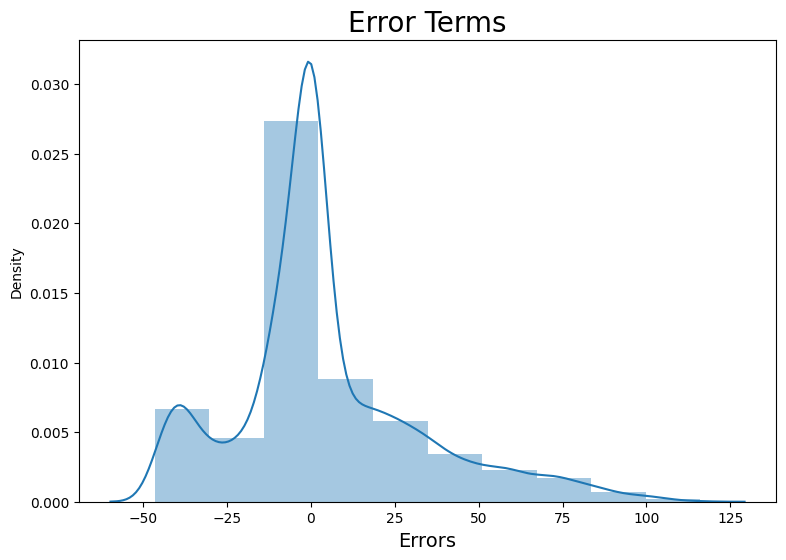

In [30]:
plt.figure(figsize=(9,6))

sns.distplot(resid2, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

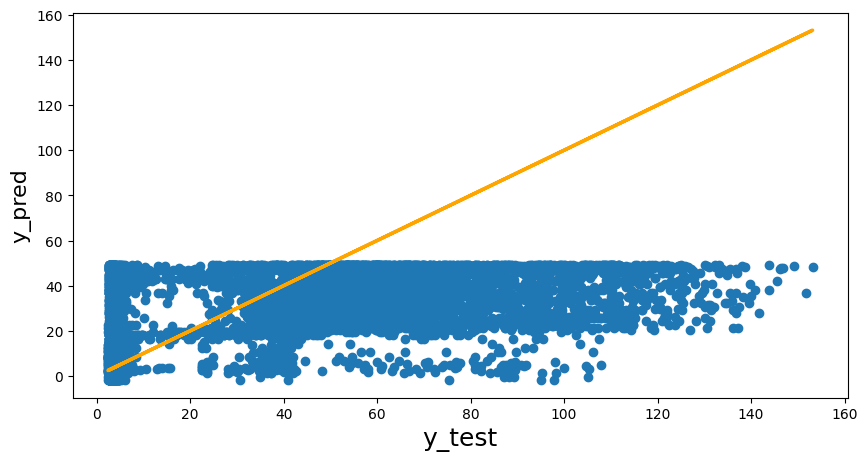

In [31]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred2)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [32]:
print("R2 Score:",r2_score(y_test, y_pred2))
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))

R2 Score: 0.2779633785992651
MAE: 19.275170121843743
MSE: 810.4018108282629


In [33]:
# Reandom Forest Regression model
from sklearn.ensemble import RandomForestRegressor

In [34]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
y_pred3 = model3.predict(X_test)
resid3 = y_test - y_pred3

<ipython-input-36-1ea8ebd0addb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid3, bins=10)


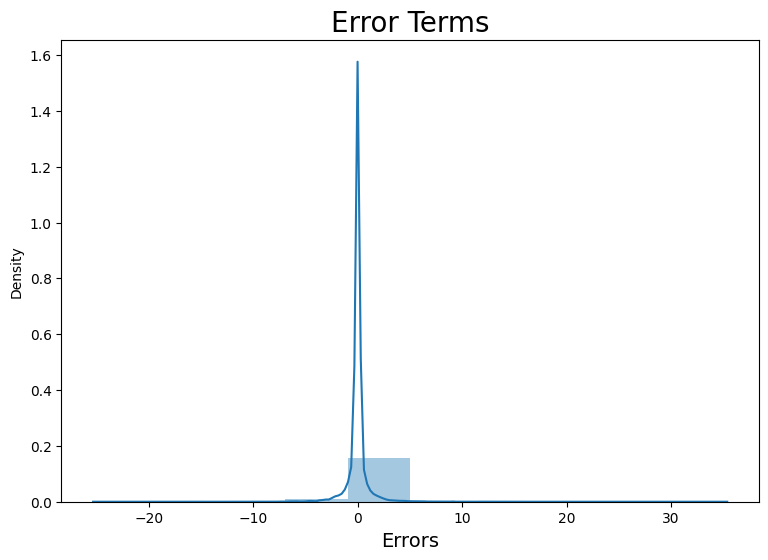

In [36]:
plt.figure(figsize=(9,6))

sns.distplot(resid3, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

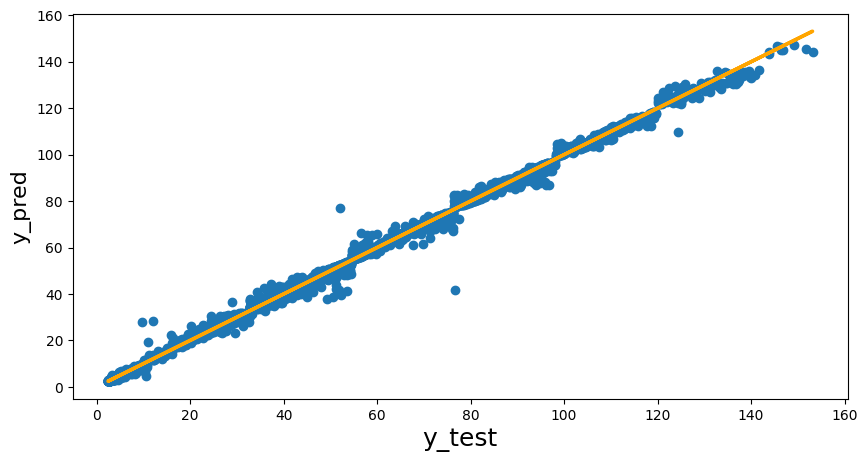

In [37]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred3)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [38]:
print("R2 Score:",r2_score(y_test, y_pred3))
print('MAE:', mean_absolute_error(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))

R2 Score: 0.9989952954885595
MAE: 0.38814396879756413
MSE: 1.127663516345127


The Random Forest does a great job predicting the values, but also the Linear Regression is an ideal choice.